In [2]:
from pymatgen import MPRester
import numpy as np
import itertools
import time
from itertools import chain, combinations
import matplotlib.pyplot as plt
import itertools

In [3]:
from routines import *

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

In [6]:
# Insert your Materials Project token. Neede to communicate with the database
token= **** 

mpr=MPRester(token)

# EXAMPLE: LLZO ELECTROCHEMICAL STABILITY COMPUTATION

In [ ]:
oxidations, reductions = \
            stability_window({'Li': 7.0, 'La': 3.0, 'Zr': 2.0, 'O': 12.0}, mpr, verbosity=False, icsd=True,
                             remove_non_comp_ox = 0  )

### Visualization of LLZO results

In [12]:
# OXIDATION: 
#
# Reults here contains for each oxidation reaction 
# a tuple of the form (potential,error_on_potential, products, stoichio_coeff) 
#
# They are listed in increasing order so that the limit oxidation reaction is the first one

# if errore = True potentials with error larger than 0.5 eV are neglected

errore=True
error_cutoff=0.5

if (errore):

    results = [ (pot,err, [prod_['formula'] for prod_ in prod],coeff) 
             for pot, err, prod, coeff in 
               sorted(zip(oxidations['pot'],oxidations['error'],oxidations['products'],oxidations['coeffs']), 
                                          key=lambda pair: pair[0]) if  err< error_cutoff ]# np.abs(err/pot)<2.0 ]
else:
    results = [ (pot,err, [prod_['formula'] for prod_ in prod],coeff) 
             for pot, err, prod, coeff in 
               sorted(zip(oxidations['pot'],oxidations['error'],oxidations['products'],oxidations['coeffs']), 
                                          key=lambda pair: pair[0]) ]

print('POSSIBLE OXIDATION REACTIONS \n')
results[0:10]

OXIDATIONS 



[(2.9905899111607175,
  0.27490502801509004,
  [{'O': 2.0}, {'O': 3.0, 'La': 2.0}, {'Zr': 1.0, 'O': 2.0}, {'Li': 1.0}],
  array([1.75, 1.5 , 2.  , 7.  ])),
 (3.0460159157142845,
  0.367904687011751,
  [{'Li': 1.0, 'O': 2.0},
   {'O': 3.0, 'La': 2.0},
   {'Zr': 1.0, 'O': 2.0},
   {'Li': 1.0}],
  array([1.75, 1.5 , 2.  , 5.25])),
 (3.082710716142861,
  0.33055769475915037,
  [{'Li': 1.0, 'O': 3.0},
   {'O': 3.0, 'La': 2.0},
   {'Zr': 1.0, 'O': 2.0},
   {'Li': 1.0}],
  array([1.16666667, 1.5       , 2.        , 5.83333333])),
 (3.2377073318750087,
  0.4988410543932982,
  [{'O': 2.0},
   {'Zr': 1.0, 'O': 2.0},
   {'Li': 1.0, 'La': 1.0, 'O': 2.0},
   {'Li': 1.0}],
  array([1., 2., 3., 4.])),
 (3.276486666517858,
  0.28444448812196627,
  [{'O': 2.0},
   {'O': 3.0, 'La': 2.0},
   {'La': 2.0, 'Zr': 2.0, 'O': 7.0},
   {'Li': 1.0}],
  array([1.75, 0.5 , 1.  , 7.  ])),
 (3.3126750414285766,
  0.2766581692195126,
  [{'O': 2.0}, {'La': 1.0, 'O': 2.0}, {'Zr': 1.0, 'O': 2.0}, {'Li': 1.0}],
  array([1

In [15]:
# REDUCTIONS: 
#
# Reults here contains for each reduction reaction 
# a tuple of the form (potential,error_on_potential, products, stoichio_coeff) 
#
# They are listed in decreasing order so that the limit reduction reaction is the first one

# if errore = True potentials with error larger than 0.5 eV are neglected


error=True
error_cutoff=0.5

if (error):

    results = [ (pot,err, [prod_['formula'] for prod_ in prod],coeff) 
         for pot, err, prod, coeff in 
           sorted(zip(reductions['pot'],reductions['error'],reductions['products'],reductions['coeffs']), 
                                      reverse=True,key=lambda pair: pair[0]) if err < error_cutoff ] #np.abs(err/pot)< 1.0 ]
else:
    
    results = [ (pot,err, [prod_['formula'] for prod_ in prod],coeff) 
         for pot, err, prod, coeff in 
           sorted(zip(reductions['pot'],reductions['error'],reductions['products'],reductions['coeffs']), 
                                      reverse=True,key=lambda pair: pair[0]) ]
    
print('POSSIBLE REDUCTION REACTIONS \n')
results[0:10]

POSSIBLE REDUCTION REACTIONS 



[(-0.3397470567218148,
  0.2615934756743069,
  [{'Zr': 1.0},
   {'Li': 2.0, 'O': 1.0},
   {'Li': 1.0, 'La': 1.0, 'O': 2.0},
   {'Li': 1.0}],
  array([ 2.,  6.,  3., -8.])),
 (-0.38465267627739474,
  0.141987838781699,
  [{'La': 1.0}, {'Zr': 1.0}, {'Li': 2.0, 'O': 1.0}, {'Li': 1.0}],
  array([  3.,   2.,  12., -17.])),
 (-0.3849690624019644,
  0.23541264049542193,
  [{'La': 1.0},
   {'Li': 2.0, 'O': 1.0},
   {'Li': 6.0, 'O': 7.0, 'Zr': 2.0},
   {'Li': 1.0}],
  array([ 3.,  5.,  1., -9.])),
 (-0.3926696674387271,
  0.2637978925337374,
  [{'Zr': 1.0}, {'Li': 2.0, 'O': 1.0}, {'O': 3.0, 'La': 2.0}, {'Li': 1.0}],
  array([ 2. ,  7.5,  1.5, -8. ])),
 (-0.4017699152696126,
  0.3418143599891333,
  [{'Li': 2.0, 'O': 1.0},
   {'Zr': 2.0, 'O': 1.0},
   {'Li': 1.0, 'La': 1.0, 'O': 2.0},
   {'Li': 1.0}],
  array([ 5.,  1.,  3., -6.])),
 (-0.4154492356372559,
  0.15509092191013887,
  [{'La': 1.0}, {'Li': 2.0, 'O': 1.0}, {'Zr': 2.0, 'O': 1.0}, {'Li': 1.0}],
  array([  3.,  11.,   1., -15.])),
 (-0.472

<ErrorbarContainer object of 3 artists>

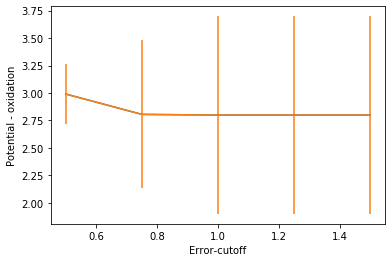

In [17]:
# OXIDATIONS
#
# We plot here as a function of the error cutoff the potential of the minimum oxidation potential found.
# For each error cutoff, potentials with error larger than error_cutoff are neglected
# Such analyisis can help to investigate the error on the final result
#

minimum=[]
minimum_error=[]
chosen= [0.5,0.75,1.0,1.25,1.5]
for error_ in chosen:
    error=True

    if (error):

        results = [ (pot,err, [prod_['formula'] for prod_ in prod],coeff) 
             for pot, err, prod, coeff in 
               sorted(zip(oxidations['pot'],oxidations['error'],oxidations['products'],oxidations['coeffs']), 
                                          reverse=False, key=lambda pair: pair[0]) if err < error_ ] #np.abs(err/pot)< 1.0 ]
    else:

        results = [ (pot,err, [prod_['formula'] for prod_ in prod],coeff) 
             for pot, err, prod, coeff in 
               sorted(zip(oxidations['pot'],oxidations['error'],oxidations['products'],oxidations['coeffs']), 
                                          reverse=False, key=lambda pair: pair[0]) ]
        
    minimum.append(results[0][0])
    minimum_error.append(results[0][1])
    
plt.ylabel('Potential - oxidation')
plt.xlabel('Error-cutoff')

plt.plot(chosen,minimum)
plt.errorbar(chosen,minimum,yerr=minimum_error)

<ErrorbarContainer object of 3 artists>

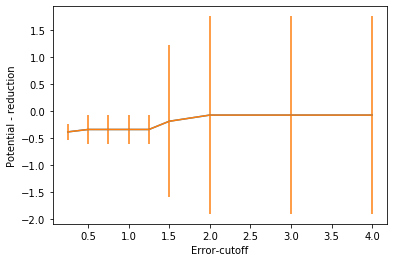

In [80]:
# REDUCTIONS
#
# We plot here as a function of the error cutoff the potential of the minimum oxidation potential found.
# For each error cutoff, potentials with error larger than error_cutoff are neglected
# Such analyisis can help to investigate the error on the final result
#

minimum=[]
minimum_error=[]
chosen= [0.25,0.5,0.75,1.0,1.25,1.5,2.0,3.0,4.0]
for error_ in chosen:
    error=True

    if (error):

        results = [ (pot,err, [prod_['formula'] for prod_ in prod],coeff) 
             for pot, err, prod, coeff in 
               sorted(zip(reductions['pot'],reductions['error'],reductions['products'],reductions['coeffs']), 
                                          reverse=True,key=lambda pair: pair[0]) if err < error_ ] #np.abs(err/pot)< 1.0 ]
    else:

        results = [ (pot,err, [prod_['formula'] for prod_ in prod],coeff) 
             for pot, err, prod, coeff in 
               sorted(zip(reductions['pot'],reductions['error'],reductions['products'],reductions['coeffs']), 
                                          reverse=True,key=lambda pair: pair[0]) ]
        
    minimum.append(results[0][0])
    minimum_error.append(results[0][1])
    
plt.ylabel('Potential - reduction')
plt.xlabel('Error-cutoff')

plt.plot(chosen,minimum)
plt.errorbar(chosen,minimum,yerr=minimum_error)

# INSPECT SELECTED INSTABILITY REACTIONS

In [10]:
reagent=download_and_filter_formula([{'Li': 7.0, 'La': 3.0, 'Zr': 2.0, 'O': 12.0}],mpr, verbosity=True, icsd=False)

products_red=download_and_filter_formula([ {'Li': 2.0, 'O': 1.0},{'La': 1.0},
                                  {'Li': 6, 'O': 7, 'Zr': 2},{'Li': 1}],mpr,verbosity=True, icsd=False)

products_ox=download_and_filter_formula([ {'Li': 2.0, 'O': 2.0},{'La': 2.0, 'O': 3.0},
                                 {'Li': 6, 'O': 7, 'Zr': 2},{'Li': 1}],mpr,verbosity=True, icsd=False)

print(compute_potential(reagent, products_ox, verbosity=True))
print(compute_potential(reagent, products_red, verbosity = True))

download_and_filter_formula
{'Li': 7.0, 'La': 3.0, 'Zr': 2.0, 'O': 12.0}
Elapsed time for downloading:  1.4825401306152344
filter_compounds_formula
{'Li': 7.0, 'La': 3.0, 'Zr': 2.0, 'O': 12.0}
96 0
0 -7.139211504375001 -7.139211504375001 96
0
End filter compounds formula---- 

 End download and filter formula---- 

download_and_filter_formula
{'Li': 2.0, 'O': 1.0}
Elapsed time for downloading:  1.486400842666626
filter_compounds_formula
{'Li': 2.0, 'O': 1.0}
102 5
0 -4.590261840392157 -4.590261840392157 102
1 -4.669131471666667 -4.669131471666667 12
2 -4.602423630686275 -4.602423630686275 102
3 -4.593584400392157 -4.593584400392157 102
4 -4.754507463333334 -4.754507463333334 3
5 -4.578540282156863 -4.578540282156863 102
3
End filter compounds formula---- 

{'La': 1.0}
Elapsed time for downloading:  0.6051418781280518
filter_compounds_formula
{'La': 1.0}
4 1
0 -4.80448641 -4.80448641 1
1 -4.9265915325 -4.9265915325 4
2 -4.92327123 -4.92327123 1
1
End filter compounds formula---- 

{'Li'